## Imports

In [1]:
import numpy as np
from paraflow import SymmetricPassage, run_simulation, get_flasher

## Passage

In [2]:
passage = SymmetricPassage(
    inlet_radius=0.2,
    area_ratio=2,
    axial_length=1,
    contour_props=[0.2, 0.5, 0.75],
    contour_angles=np.radians([-20, 15.0, 15.0]).tolist()
)
passage.visualize()

## Inlet and Outlet Condtions

In [3]:
flasher = get_flasher("Octamethyltrisiloxane", "gas")
inlet_total_state = flasher.flash(P=904388, T=542.13, mach_number=1E-9)
target_outlet_static_state = flasher.flash(P=200000, T=293.15)

## Run Simulation

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00164258s, CPU 0.001652s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.0008575s, CPU 0.000658s)
Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 4.75021e-06s, CPU 4e-06s)
Info    : 10204 nodes 10407 elements
Setting up SU2 Simulation for /Users/afshawnlotfi/Documents/paraflow/simulation_out/config1.cfg
Running SU2 Simulation for /Users/afshawnlotfi/Documents/paraflow/simulation_out/config1.cfg
Cleaning up ..


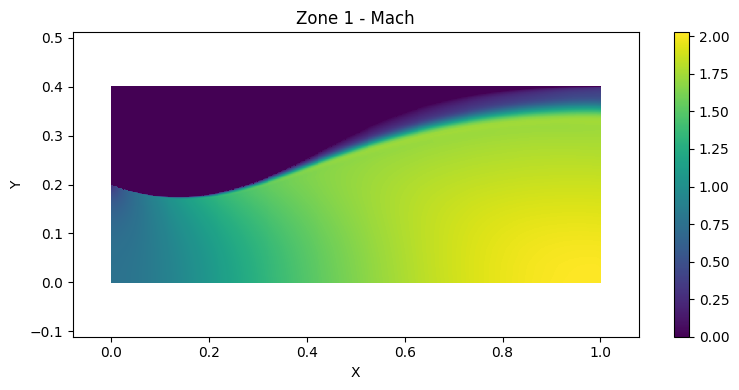

In [5]:
from paraflow import run_simulation, SimulationOptions, SimulationResult, get_frames, display_frame

use_cache = False

if not use_cache:
    sim_results = run_simulation(
        passage,
        sim_options=SimulationOptions(
            inlet_total_state=inlet_total_state, 
            target_outlet_static_state=target_outlet_static_state, 
        ),
        working_directory="./simulation_out", 
        id="1",
        auto_delete=True,
        verbose=False,
    )
    sim_results.to_file("sim_results.pkl")
else:
   sim_results = SimulationResult.from_file("sim_results.pkl")

frames = get_frames(
    sim_results, 
    property_names=["Mach"], 
    num_pnts=500,
)
display_frame(frames, "Mach")